The IMF's CompactData method, combined with codes for the series, frequency, area, and indicator, returns a JSON structured dataset. The codes and method are explained in more detail as follows:

    Method: CompactData retrieves data, DataStructure retrieves series information, and GenericMetadata returns the metadata;

    Series: The broad group of indicators, in this case International Financial Statistics IFS;

    Frequency: For example monthly M, quarterly Q, or annually A;

    Area: The country, region, or set of countries, for example GB for the U.K., or GB+US for the U.K. and the U.S.;

    Indicator: The code for the indicator of interest--IFS includes more than 2,500. In the example above, the code of interest is PMP_IX; and

    Date Range (Optional): Use this to limit the data range returned, for example ?startPeriod=2010&endPeriod=2017 otherwise the full set of data is returned.

The order in which codes are combined is referred to as the dimensions of the data, in the IFS case: {Method}/{Series}/{Frequency}.{Area}.{Indicator}.{Date Range}

In [28]:
import requests
import pprint
import pandas as pd

In [44]:
key = 'CompactData/IFS/M.MX.PMP_IX'
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'

In [45]:
data = (requests.get(f'{url}{key}').json()
        ['CompactData']['DataSet']['Series'])

In [46]:
pprint.pprint(data)

{'@BASE_YEAR': '2010=100',
 '@FREQ': 'M',
 '@INDICATOR': 'PMP_IX',
 '@REF_AREA': 'MX',
 '@TIME_FORMAT': 'P1M',
 '@UNIT_MULT': '0',
 'Obs': [{'@OBS_VALUE': '45.1516179008145', '@TIME_PERIOD': '1980-01'},
         {'@OBS_VALUE': '45.9220355160774', '@TIME_PERIOD': '1980-02'},
         {'@OBS_VALUE': '46.1778884903483', '@TIME_PERIOD': '1980-03'},
         {'@OBS_VALUE': '46.8835090767456', '@TIME_PERIOD': '1980-04'},
         {'@OBS_VALUE': '47.0807588557925', '@TIME_PERIOD': '1980-05'},
         {'@OBS_VALUE': '47.3489994973466', '@TIME_PERIOD': '1980-06'},
         {'@OBS_VALUE': '48.3462067136392', '@TIME_PERIOD': '1980-07'},
         {'@OBS_VALUE': '48.5644202373191', '@TIME_PERIOD': '1980-08'},
         {'@OBS_VALUE': '48.5486974288444', '@TIME_PERIOD': '1980-09'},
         {'@OBS_VALUE': '49.0232403755369', '@TIME_PERIOD': '1980-10'},
         {'@OBS_VALUE': '49.1919032300842', '@TIME_PERIOD': '1980-11'},
         {'@OBS_VALUE': '49.4892072448796', '@TIME_PERIOD': '1980-12'},
     

In [26]:
print(data['Obs'][-1]) # Print latest observation

{'@TIME_PERIOD': '2015-08', '@OBS_VALUE': '105.155095976629'}


In [29]:
baseyr = data['@BASE_YEAR']  # Save the base year

# Create pandas dataframe from the observations
data_list = [[obs.get('@TIME_PERIOD'), obs.get('@OBS_VALUE')]
             for obs in data['Obs']]

df = pd.DataFrame(data_list, columns=['date', 'value'])
     
df = df.set_index(pd.to_datetime(df['date']))['value'].astype('float')

# Save cleaned dataframe as a csv file
df.to_csv('UK_import_price_index.csv', header=True)

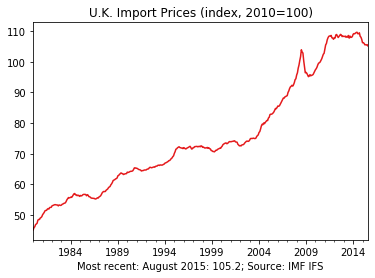

In [30]:
# Title and text with recent value
title = f'U.K. Import Prices (index, {baseyr})'
recentdt = df.index[-1].strftime('%B %Y')
recentval = round(df[-1], 1)
recent = f'Most recent: {recentdt}: {recentval}'
source = 'Source: IMF IFS'

# Basic plot
plot = df.plot(title=title, colormap='Set1')
plot = plot.set_xlabel(f'{recent}; {source}')

In [78]:
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
key = 'Dataflow'  # Method with series information
search_term = 'Outlook'  # Term to find in series names
series_list = requests.get(f'{url}{key}').json()\
            ['Structure']['Dataflows']['Dataflow']
# Use dict keys to navigate through results:
for series in series_list:
    if search_term in series['Name']['#text']:
        print(f"{series['Name']['#text']}: {series['KeyFamilyRef']['KeyFamilyID']}")

Middle East and Central Asia Regional Economic Outlook (MCDREO): MCDREO
Asia and Pacific Regional Economic Outlook (APDREO): APDREO
Sub-Saharan Africa Regional Economic Outlook (AFRREO): AFRREO
MCD Regional Economic Outlook October 2014: MCDREO201410
Sub-Saharan Africa Regional Economic Outlook (AFRREO) October 2014: AFRREO201410
MCD Regional Economic Outlook January 2015: MCDREO201501
Asia and Pacific Regional Economic Outlook (APDREO) October 2014: APDREO201410
Western Hemisphere Regional Economic Outlook (WHDREO) April 2015: WHDREO201504
Western Hemisphere Regional Economic Outlook (WHDREO): WHDREO
Asia and Pacific Regional Economic Outlook (APDREO) April 2015: APDREO201504
MCD Regional Economic Outlook May 2015: MCDREO201505
Sub-Saharan Africa Regional Economic Outlook (AFRREO) April 2015: AFRREO201504
MCD Regional Economic Outlook (MCDREO) October 2015: MCDREO201510
Western Hemisphere Regional Economic Outlook (WHDREO) October 2015: WHDREO201510
Asia and Pacific Regional Economic 

In [80]:
key = 'DataStructure/IFS'  # Method / series
dimension_list = requests.get(f'{url}{key}').json()\
            ['Structure']['KeyFamilies']['KeyFamily']\
            ['Components']['Dimension']
for n, dimension in enumerate(dimension_list):
    print(f'Dimension {n+1}: {dimension["@codelist"]}')

Dimension 1: CL_FREQ
Dimension 2: CL_AREA_IFS
Dimension 3: CL_INDICATOR_IFS


In [92]:
key = 'DataStructure/IFS'  # Method / series
dimension_list = requests.get(f'{url}{key}').json()

pprint.pprint(dimension_list)


{'Structure': {'@xmlns': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
               '@xmlns:xsd': 'http://www.w3.org/2001/XMLSchema',
               '@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
               '@xsi:schemaLocation': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message '
                                      'https://registry.sdmx.org/schemas/v2_0/SDMXMessage.xsd',
               'CodeLists': {'CodeList': [{'@agencyID': 'IMF',
                                           '@id': 'CL_UNIT_MULT',
                                           '@isFinal': 'true',
                                           '@version': '1.0',
                                           '@xmlns': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/structure',
                                           'Code': [{'@value': '0',
                                                     'Description': {'#text': 'Units',
                                                       

                                                     'Description': {'#text': 'World '
                                                                              '(all '
                                                                              'areas, '
                                                                              'including '
                                                                              'reference '
                                                                              'area, '
                                                                              'including '
                                                                              'IO)',
                                                                     '@xml:lang': 'en'}},
                                                    {'@value': '1C_All_Countries_Published',
                                                     'Description': {'#text': 'All '
                          

                                                                     '@xml:lang': 'en'}},
                                                    {'@value': 'TMG_D_CIF_IX',
                                                     'Description': {'#text': 'External '
                                                                              'Trade, '
                                                                              'Goods, '
                                                                              'Deflator/Unit '
                                                                              'Value '
                                                                              'of '
                                                                              'Imports, '
                                                                              'Cost '
                                                                              'Insurance '
                                

                                                     'Description': {'#text': 'Fiscal, '
                                                                              'Budgetary '
                                                                              'Central '
                                                                              'Government, '
                                                                              'Assets '
                                                                              'and '
                                                                              'Liabilities, '
                                                                              'Financial '
                                                                              'Assets, '
                                                                              'Insurance '
                                                                              'Technical '
         

                                                                              'and '
                                                                              'Liabilities, '
                                                                              'Financial '
                                                                              'Assets, '
                                                                              'Insurance '
                                                                              'Technical '
                                                                              'Reserves, '
                                                                              'Classification '
                                                                              'of '
                                                                              'transactions '
                                                                              'in '
          

                                                     'Description': {'#text': 'Fiscal, '
                                                                              'General '
                                                                              'Government, '
                                                                              'Assets '
                                                                              'and '
                                                                              'Liabilities, '
                                                                              'Financial '
                                                                              'Assets, '
                                                                              'Other '
                                                                              'Accounts '
                                                                              'Receivable, '
            

                                                                              'Domestic '
                                                                              'Product, '
                                                                              'Real, '
                                                                              'Domestic '
                                                                              'Currency',
                                                                     '@xml:lang': 'en'}},
                                                    {'@value': 'NGDP_R_PC_CP_A_PT',
                                                     'Description': {'#text': 'National '
                                                                              'Accounts, '
                                                                              'Expenditure, '
                                                                              'Gross '
                 

                                                                     '@xml:lang': 'en'}},
                                                    {'@value': 'FASAOF_EUR',
                                                     'Description': {'#text': 'Monetary, '
                                                                              'Central '
                                                                              'Bank '
                                                                              'Survey, '
                                                                              'Claims '
                                                                              'on '
                                                                              'Other '
                                                                              'Sectors, '
                                                                              'Claims '
                                         

                                                                              'Depository '
                                                                              'Corporations '
                                                                              'Survey, '
                                                                              'Euro '
                                                                              'area-Wide-Residency, '
                                                                              'Liabilities '
                                                                              'to '
                                                                              'Central '
                                                                              'Government, '
                                                                              'Euros',
                                                                     '@xml:lang': 'en'}},
 

                                                                              'Authorities, '
                                                                              'Restricted '
                                                                              'Deposits '
                                                                              '(Non-Standardized '
                                                                              'Presentation), '
                                                                              'Euros',
                                                                     '@xml:lang': 'en'}},
                                                    {'@value': '16B___USD',
                                                     'Description': {'#text': 'Monetary, '
                                                                              'Monetary '
                                                                              'Authorities, '
 

                                                                              'Corporations '
                                                                              'Survey, '
                                                                              'Insurance '
                                                                              'Technical '
                                                                              'Reserves, '
                                                                              'US '
                                                                              'Dollars',
                                                                     '@xml:lang': 'en'}},
                                                    {'@value': 'FOSLA_XDC',
                                                     'Description': {'#text': 'Monetary, '
                                                                              'Other '
                           

                                                    {'@value': 'BFPLDXF_BP6_USD',
                                                     'Description': {'#text': 'Balance '
                                                                              'of '
                                                                              'Payments, '
                                                                              'Supplementary '
                                                                              'Items, '
                                                                              'Portfolio '
                                                                              'Investment, '
                                                                              'Net '
                                                                              'incurrence '
                                                                              'of '
                          

In [88]:
# Example: codes for third dimension, which is 2 in python
key = f"CodeList/{dimension_list[2]['@codelist']}"
search_term = 'tax'  # Term to find in series names
code_list = requests.get(f'{url}{key}').json()\
	    ['Structure']['CodeLists']['CodeList']['Code']
for code in code_list:
    if search_term in code['Description']['#text']:
        print(f"{code['Description']['#text']}: {code['@value']}")

Budgetary Central Government, Other taxes (Cash), Domestic Currency: BCG_GRTO_G01_CA_XDC
Central Government (including Social Security), Other taxes (Cash), Domestic Currency: CG01_GRTO_G01_CA_XDC
Central Government (including Social Security), Other taxes [116], Domestic Currency: CG01_GRTO_G01_XDC
General Government, Other taxes (Cash), Domestic Currency: GG_GRTO_G01_CA_XDC
General Government, Other taxes [116], Domestic Currency: GG_GRTO_G01_XDC


In [71]:

url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
key = 'GenericMetadata/IFS/M.MX.LU_PE_NUM'
metadata = requests.get(f'{url}{key}').json()
country = metadata['GenericMetadata']['MetadataSet']\
            ['AttributeValueSet'][1]['ReportedAttribute']\
            [1]['ReportedAttribute'][3]['Value']['#text']
indicator = metadata['GenericMetadata']['MetadataSet']\
            ['AttributeValueSet'][2]['ReportedAttribute']\
            [1]['ReportedAttribute'][4]['Value']['#text']
print(f'Country: {country}; Indicator: {indicator}')

Country: Mexico; Indicator: Number of


In [72]:
pprint.pprint(metadata)

{'GenericMetadata': {'@xmlns': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
                     '@xmlns:xsd': 'http://www.w3.org/2001/XMLSchema',
                     '@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
                     '@xsi:schemaLocation': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message '
                                            'https://registry.sdmx.org/schemas/v2_0/SDMXMessage.xsd',
                     'Header': {'DataSetID': 'IFS',
                                'ID': 'ca9593ef-a99b-460b-81b8-5607fedfbf1f',
                                'Prepared': '2020-06-18T19:16:26',
                                'Receiver': {'@id': 'ZZZ'},
                                'Sender': {'@id': '1C0',
                                           'Contact': {'Telephone': '+ 1 (202) '
                                                                    '623-6220',
                                                       'URI': 'http://www.i

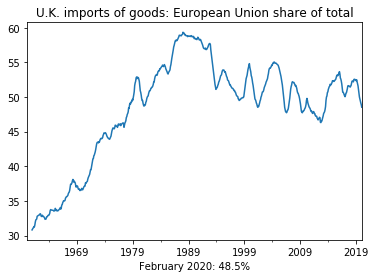

In [61]:
key = 'CompactData/DOT/M.GB.TMG_CIF_USD.B0+W00'

# Retrieve data from IMF API
data = requests.get(f'{url}{key}').json()

# Convert results to pandas dataframe
df = pd.DataFrame({s['@COUNTERPART_AREA'] : {pd.to_datetime(i['@TIME_PERIOD']) : 
     round(float(i['@OBS_VALUE']), 1) for i in s['Obs']} 
     for s in data['CompactData']['DataSet']['Series']})

# 12 month moving average of EU share of total
eu_share = (df['B0'].div(df['W00']) * 100).rolling(12).mean()

# Create a line plot and print most recent value as x label
title = "U.K. imports of goods: European Union share of total"
recent = f"{eu_share.index[-1].strftime('%B %Y')}: {eu_share[-1].round(1)}%"
ax = eu_share.plot(title=title)
ax = ax.set_xlabel(recent)